In [2]:
import requests
import json
import pandas as pd
import numpy as np
import pickle
import os
from datetime import datetime
import joblib




In [3]:

base_url="https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/india/2022-01-01/2024-06-25?unitGroup=metric&include=days&key=JYMHZ8UAUG3HKY4PAZB9JMBHL&contentType=json"

response=requests.get(base_url).json()

    
data=json.dumps(response,indent=4)
print(data)

{
    "queryCost": 907,
    "latitude": 28.631,
    "longitude": 77.2172,
    "resolvedAddress": "India",
    "address": "india",
    "timezone": "Asia/Kolkata",
    "tzoffset": 5.5,
    "days": [
        {
            "datetime": "2022-01-01",
            "datetimeEpoch": 1640975400,
            "tempmax": 19.5,
            "tempmin": 6.3,
            "temp": 11.9,
            "feelslikemax": 19.5,
            "feelslikemin": 6.0,
            "feelslike": 11.8,
            "dew": 8.3,
            "humidity": 80.7,
            "precip": 0.0,
            "precipprob": 0.0,
            "precipcover": 0.0,
            "preciptype": null,
            "snow": 0.0,
            "snowdepth": 0.0,
            "windgust": 19.8,
            "windspeed": 9.4,
            "winddir": 278.6,
            "pressure": 1022.1,
            "cloudcover": 9.7,
            "visibility": 1.4,
            "solarradiation": 165.9,
            "solarenergy": 14.3,
            "uvindex": 6.0,
            "sunrise

In [4]:
weather_data=[]
if "days" in response:
    for j in range(0,len(response["days"])):
        try:
            
        #fetching the useful data from the data json
            temp=response["days"][j]["temp"]
            temp_min=response["days"][j]["tempmin"]
            feels_like=response["days"][j]["feelslike"]
            temp_max=response["days"][j]["tempmax"]
            humidity=response["days"][j]["humidity"]
            Condition=response["days"][j]["conditions"]
            windspeed=response["days"][j]["windspeed"]
            date=response["days"][j]["datetime"]
            precipitation=response["days"][j]["precip"]
            pressure=response["days"][j]["pressure"]
            
            weather_info = {
                "date": date,
                "tempmax": temp_max,
                "tempmin": temp_min,
                "temp": temp,
                "feelslike": feels_like,
                "humidity": humidity,
                "windspeed":windspeed,
                "pressure":pressure,
                "precipitation":precipitation
            }
            
            weather_data.append(weather_info)
        except KeyError as e:
            print(f"KeyError : {e}")       
    df=pd.DataFrame(weather_data)

In [5]:
df

,date,tempmax,tempmin,temp,feelslike,humidity,windspeed,pressure,precipitation
0,2022-01-01,19.5,6.3,11.9,11.8,80.7,9.4,1022.1,0.000
1,2022-01-02,19.8,7.4,12.7,12.6,80.9,8.0,1020.7,0.000
2,2022-01-03,20.6,7.4,13.8,13.8,76.1,13.0,1018.6,0.000
3,2022-01-04,22.5,9.7,15.8,15.8,71.1,7.6,1017.7,0.000
4,2022-01-05,15.0,12.2,13.7,13.7,91.8,22.3,1016.6,7.674
...,...,...,...,...,...,...,...,...,...
902,2024-06-21,38.0,27.0,31.9,36.3,60.4,14.8,999.4,3.588
903,2024-06-22,38.6,29.0,33.2,38.1,55.7,16.6,999.4,0.000
904,2024-06-23,39.1,30.0,33.5,40.4,59.3,18.4,1000.1,1.480
905,2024-06-24,38.4,30.0,33.2,41.5,65.3,18.4,999.0,0.890


In [6]:
df.to_csv("data.csv")

In [7]:
print(df.shape)
print(df.info())


(907, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           907 non-null    object 
 1   tempmax        907 non-null    float64
 2   tempmin        907 non-null    float64
 3   temp           907 non-null    float64
 4   feelslike      907 non-null    float64
 5   humidity       907 non-null    float64
 6   windspeed      907 non-null    float64
 7   pressure       907 non-null    float64
 8   precipitation  907 non-null    float64
dtypes: float64(8), object(1)
memory usage: 63.9+ KB
None


In [10]:
df["date"]=pd.to_datetime(df["date"])
df["day"]=df["date"].dt.day
df["month"]=df["date"].dt.month
df["year"]=df["date"].dt.year
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           907 non-null    datetime64[ns]
 1   tempmax        907 non-null    float64       
 2   tempmin        907 non-null    float64       
 3   temp           907 non-null    float64       
 4   feelslike      907 non-null    float64       
 5   humidity       907 non-null    float64       
 6   windspeed      907 non-null    float64       
 7   pressure       907 non-null    float64       
 8   precipitation  907 non-null    float64       
 9   day            907 non-null    int32         
 10  month          907 non-null    int32         
 11  year           907 non-null    int32         
dtypes: datetime64[ns](1), float64(8), int32(3)
memory usage: 74.5 KB


In [11]:
df

,date,tempmax,tempmin,temp,feelslike,humidity,windspeed,pressure,precipitation,day,month,year
0,2022-01-01,19.5,6.3,11.9,11.8,80.7,9.4,1022.1,0.000,1,1,2022
1,2022-01-02,19.8,7.4,12.7,12.6,80.9,8.0,1020.7,0.000,2,1,2022
2,2022-01-03,20.6,7.4,13.8,13.8,76.1,13.0,1018.6,0.000,3,1,2022
3,2022-01-04,22.5,9.7,15.8,15.8,71.1,7.6,1017.7,0.000,4,1,2022
4,2022-01-05,15.0,12.2,13.7,13.7,91.8,22.3,1016.6,7.674,5,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
902,2024-06-21,38.0,27.0,31.9,36.3,60.4,14.8,999.4,3.588,21,6,2024
903,2024-06-22,38.6,29.0,33.2,38.1,55.7,16.6,999.4,0.000,22,6,2024
904,2024-06-23,39.1,30.0,33.5,40.4,59.3,18.4,1000.1,1.480,23,6,2024
905,2024-06-24,38.4,30.0,33.2,41.5,65.3,18.4,999.0,0.890,24,6,2024


In [12]:
corr=df.corr()
corr

,date,tempmax,tempmin,temp,feelslike,humidity,windspeed,pressure,precipitation,day,month,year
date,1.000000,0.042490,0.013406,0.031274,0.008556,-0.127775,-0.059132,0.090941,-0.053992,0.022713,0.097801,0.924598
tempmax,0.042490,1.000000,0.890952,0.974811,0.895154,-0.701545,0.321037,-0.803486,-0.074427,0.016993,0.151586,-0.016161
tempmin,0.013406,0.890952,1.000000,0.965114,0.974720,-0.393956,0.343854,-0.899849,0.048856,0.012513,0.225532,-0.072200
temp,0.031274,0.974811,0.965114,1.000000,0.957507,-0.586993,0.344824,-0.871591,-0.019832,0.009129,0.179217,-0.037198
feelslike,0.008556,0.895154,0.974720,0.957507,1.000000,-0.376023,0.309442,-0.904904,0.015896,0.018953,0.234442,-0.080493
humidity,-0.127775,-0.701545,-0.393956,-0.586993,-0.376023,1.000000,-0.248625,0.309999,0.268176,0.033050,0.108120,-0.166012
windspeed,-0.059132,0.321037,0.343854,0.344824,0.309442,-0.248625,1.000000,-0.380826,0.119497,0.045871,-0.147899,-0.001467
pressure,0.090941,-0.803486,-0.899849,-0.871591,-0.904904,0.309999,-0.380826,1.000000,-0.110411,-0.035449,-0.120536,0.133486
precipitation,-0.053992,-0.074427,0.048856,-0.019832,0.015896,0.268176,0.119497,-0.110411,1.000000,0.033968,0.042529,-0.069133
day,0.022713,0.016993,0.012513,0.009129,0.018953,0.033050,0.045871,-0.035449,0.033968,1.000000,0.010207,-0.014177


In [12]:
corr["temp"].sort_values(ascending=False)

temp             1.000000
tempmax          0.974811
tempmin          0.965114
feelslike        0.957507
windspeed        0.344824
month            0.179217
date             0.031274
day              0.009129
precipitation   -0.019832
year            -0.037198
humidity        -0.586993
pressure        -0.871591
Name: temp, dtype: float64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

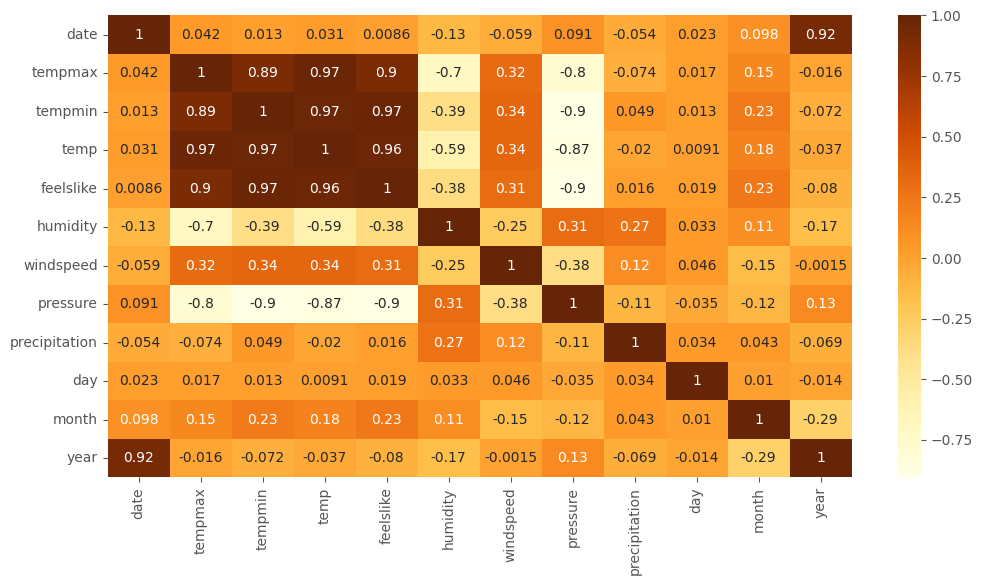

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap="YlOrBr")
plt.show()

In [15]:
df.isnull().sum()

date             0
tempmax          0
tempmin          0
temp             0
feelslike        0
humidity         0
windspeed        0
pressure         0
precipitation    0
day              0
month            0
year             0
dtype: int64

In [16]:
df.columns

Index(['date', 'tempmax', 'tempmin', 'temp', 'feelslike', 'humidity',
       'windspeed', 'pressure', 'precipitation', 'day', 'month', 'year'],
      dtype='object')

In [17]:
df_datetime=df.set_index("date")
df_datetime.head()

,tempmax,tempmin,temp,feelslike,humidity,windspeed,pressure,precipitation,day,month,year
date,,,,,,,,,,,
2022-01-01,19.5,6.3,11.9,11.8,80.7,9.4,1022.1,0.000,1,1,2022
2022-01-02,19.8,7.4,12.7,12.6,80.9,8.0,1020.7,0.000,2,1,2022
2022-01-03,20.6,7.4,13.8,13.8,76.1,13.0,1018.6,0.000,3,1,2022
2022-01-04,22.5,9.7,15.8,15.8,71.1,7.6,1017.7,0.000,4,1,2022
2022-01-05,15.0,12.2,13.7,13.7,91.8,22.3,1016.6,7.674,5,1,2022


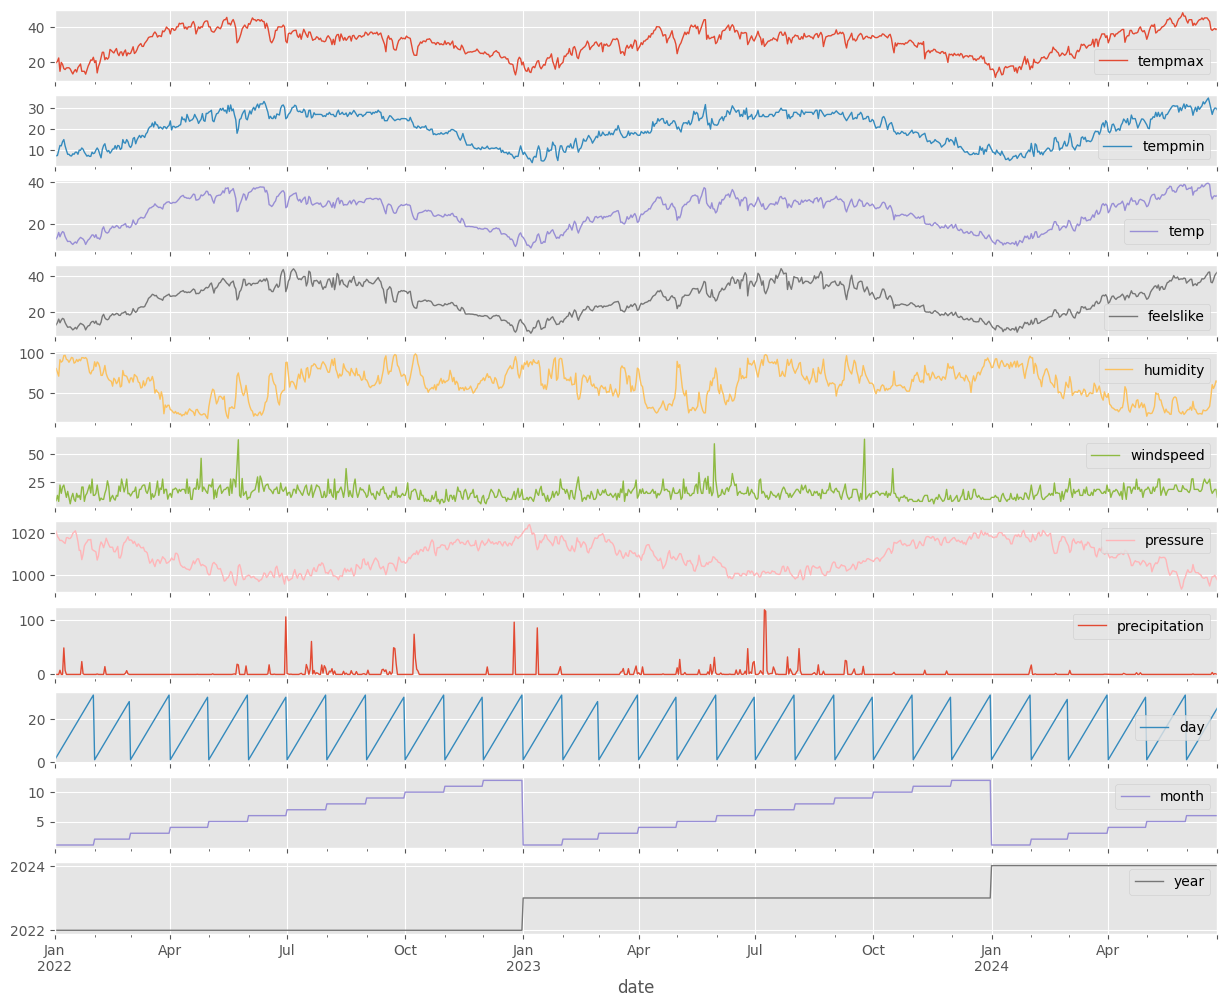

In [18]:
df_datetime.plot(subplots=True, layout=(len(df_datetime.columns), 1), figsize=(15, 12), sharex=True,lw=1)
plt.show()

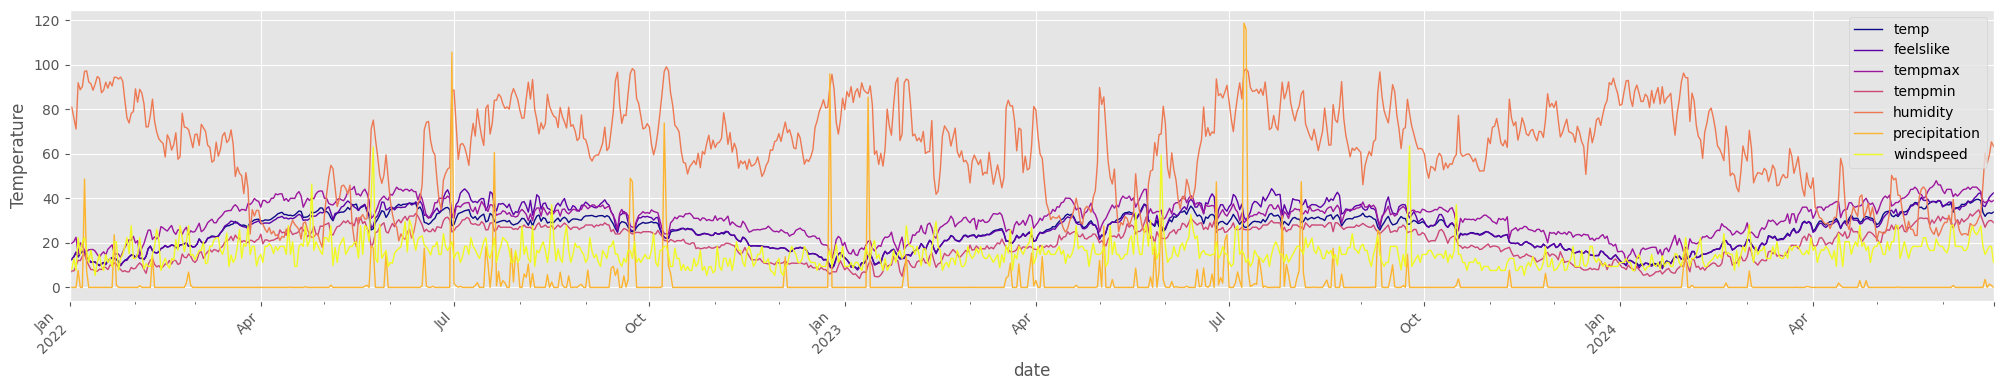

In [19]:
df_datetime.plot(y=["temp","feelslike","tempmax","tempmin","humidity","precipitation","windspeed"],figsize=(20,4),cmap="plasma",lw=1)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.ylabel("Temperature")

plt.legend(loc="best")

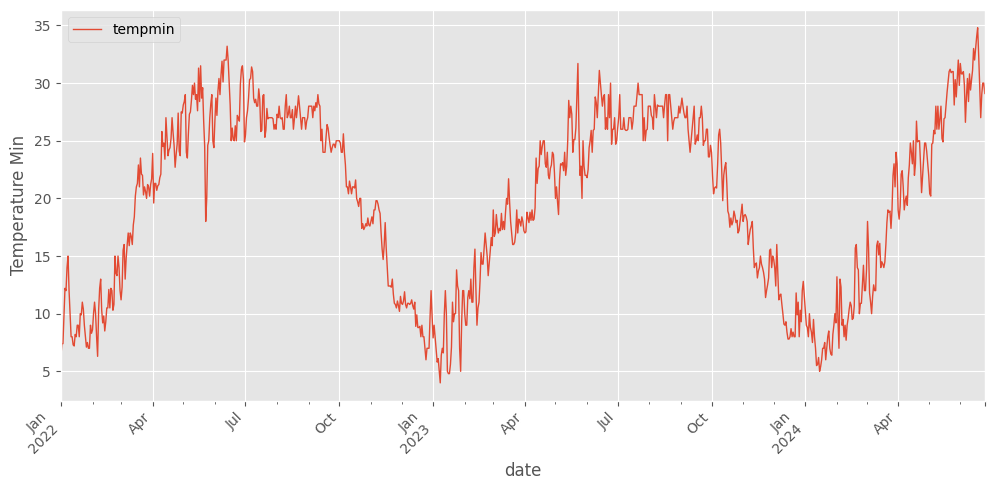

In [20]:
plt.style.use("ggplot")
df_datetime.plot(y="tempmin",figsize=(10,5),lw=1)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.ylabel("Temperature Min")

plt.legend(loc="best")

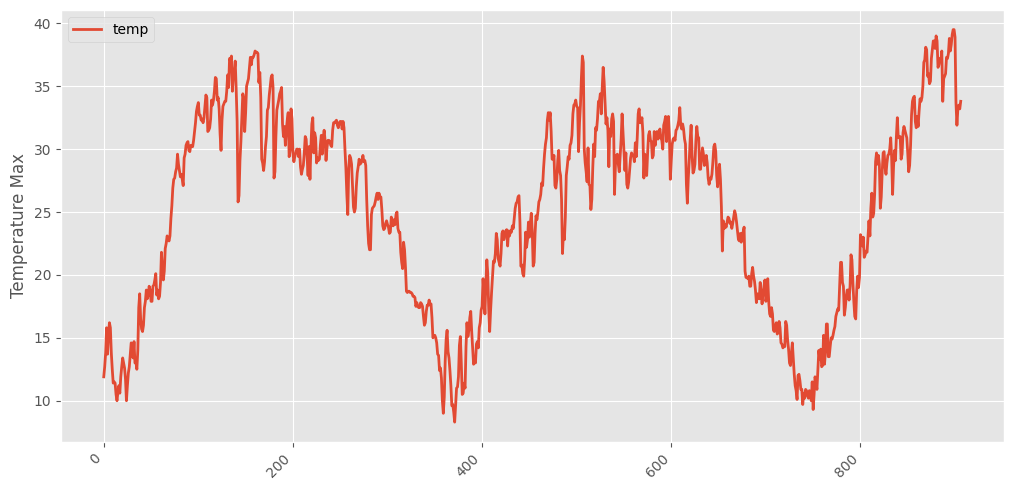

In [21]:
plt.style.use("ggplot")
df["temp"].plot(figsize=(10,5),lw=2)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.ylabel("Temperature Max")

plt.legend(loc="best")

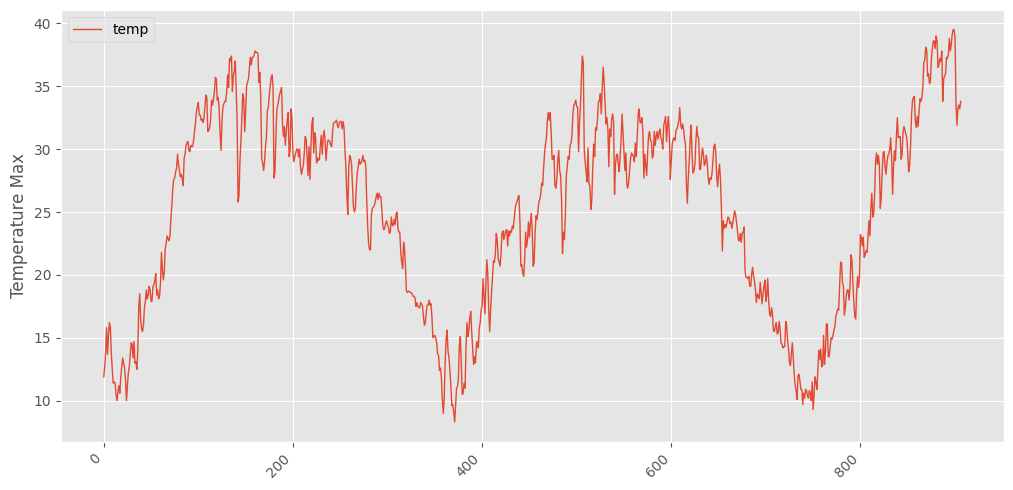

In [22]:
df.plot(y="temp",figsize=(10,5),lw=1)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.ylabel("Temperature Max")

plt.legend(loc="best")

In [23]:
#creating the list for each feature
X0=[] #day
X1=[] #month
X2=[] #year
X3=[] #tempmax
X4=[] #tempmin
X5=[] #feelslike
X6=[] #humidity
X7=[] #windspeed
X8=[] #pressure
X9=[] #precipitation
X10=[] #temperature
y=[] #temperature
for i in range(0,df.shape[0]-30):
    X0.append(df.iloc[i:i+30,9])
    X1.append(df.iloc[i:i+30,10])
    X2.append(df.iloc[i:i+30,11])
    X3.append(df.iloc[i:i+30,1])
    X4.append(df.iloc[i:i+30,2])
    X5.append(df.iloc[i:i+30,4])
    X6.append(df.iloc[i:i+30,5])
    X7.append(df.iloc[i:i+30,6])
    X8.append(df.iloc[i:i+30,7])
    X9.append(df.iloc[i:i+30,8])
    X10.append(df.iloc[i:i+30,3])
    y.append(df.iloc[i+30,3])

In [24]:
len(X5)

877

In [25]:
X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y=np.array(X0),np.array(X1),np.array(X2),np.array(X3),np.array(X4),np.array(X5),np.array(X6),np.array(X7),np.array(X8),np.array(X9),np.array(X10),np.array(y)


In [26]:
y.shape,X5.shape


((877,), (877, 30))

In [27]:
y=np.reshape(y,(len(y),1))
y.shape

(877, 1)

In [28]:
#scaling the data 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X0=scaler.fit_transform(X0)
X1=scaler.fit_transform(X1)
X2=scaler.fit_transform(X2)
X3=scaler.fit_transform(X3)
X4=scaler.fit_transform(X4)
X5=scaler.fit_transform(X5)
X6=scaler.fit_transform(X6)
X7=scaler.fit_transform(X7)
X8=scaler.fit_transform(X8)
X9=scaler.fit_transform(X9)
X10=scaler.fit_transform(X10)

y=scaler.fit_transform(y)





In [29]:
joblib.dump(scaler,"scaler.joblib")

['scaler.joblib']

In [30]:
X0

array([[0.        , 0.03333333, 0.06666667, ..., 0.9       , 0.93333333,
        0.96666667],
       [0.03333333, 0.06666667, 0.1       , ..., 0.93333333, 0.96666667,
        1.        ],
       [0.06666667, 0.1       , 0.13333333, ..., 0.96666667, 1.        ,
        0.        ],
       ...,
       [0.76666667, 0.8       , 0.83333333, ..., 0.63333333, 0.66666667,
        0.7       ],
       [0.8       , 0.83333333, 0.86666667, ..., 0.66666667, 0.7       ,
        0.73333333],
       [0.83333333, 0.86666667, 0.9       , ..., 0.7       , 0.73333333,
        0.76666667]])

In [31]:
print(X0.shape)
print(X1.shape)

(877, 30)
(877, 30)


In [32]:
X=np.stack([X10],axis=2)
X.shape

(877, 30, 1)

In [33]:
X_train,X_test=X[:500],X[500:]
y_train,y_test=y[:500],y[500:]
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)


(500, 30, 1)
(500, 1)
(377, 1)
(377, 30, 1)


Building the LSTM model

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,CSVLogger
from tensorflow.keras.optimizers import SGD
from keras import Sequential,layers
from keras.layers import Dropout,Dense,LSTM,Bidirectional
from keras.regularizers import l2

tf.random.set_seed(4)

In [35]:
callback=[
    # EarlyStopping(monitor="val_loss",patience=20,restore_best_weights=True,verbose=1,mode="min"),
    CSVLogger("logs.csv",separator=",",append=False)
]

In [36]:
model= Sequential()
model.add(Bidirectional(LSTM(units=128,return_sequences=False,activation="relu",input_shape = (X_train.shape[1],1))))
model.add(Dropout(0.4))
model.add(Dense(units = 1))

e:\weather forecasting\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer="adam", loss='mean_squared_error',metrics=['mae'])

In [38]:
model.fit(X_train,y_train, epochs=40,validation_split=0.2,callbacks=callback)

Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2041 - mae: 0.3923 - val_loss: 0.0220 - val_mae: 0.1224
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0261 - mae: 0.1281 - val_loss: 0.0232 - val_mae: 0.1309
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0158 - mae: 0.1022 - val_loss: 0.0094 - val_mae: 0.0791
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0139 - mae: 0.0954 - val_loss: 0.0113 - val_mae: 0.0881
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0120 - mae: 0.0870 - val_loss: 0.0113 - val_mae: 0.0889
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0110 - mae: 0.0831 - val_loss: 0.0124 - val_mae: 0.0948
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0112 - mae: 0.0846 - val_loss: 0.0126 - val_mae: 0.0963
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0121 - mae: 0.0884 - val_loss: 0.0125 - val_mae: 0.0960
Epoch 9/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.009

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 400,133 (1.53 MB)

 Trainable params: 133,377 (521.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 266,756 (1.02 MB)

In [40]:
model.evaluate(X_train,y_train)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mae: 0.0498


[0.0046449159272015095, 0.05460140109062195]

##### An error of 0.046 on train data

In [41]:
model.evaluate(X_test,y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mae: 0.0405


[0.003155066631734371, 0.04393748566508293]

##### An error of 0.0411 on test data

In [42]:
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)
predictions.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


(377, 1)

In [43]:
pred=model.predict(X_train)
pred=scaler.inverse_transform(pred)
pred

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[13.150452],
       [13.337074],
       [13.411627],
       [13.722499],
       [13.876729],
       [13.97094 ],
       [14.058422],
       [14.402496],
       [15.151965],
       [15.92055 ],
       [16.353159],
       [16.592289],
       [16.752071],
       [16.940407],
       [17.261356],
       [17.591024],
       [18.028208],
       [18.328726],
       [18.59504 ],
       [18.975315],
       [19.266647],
       [19.356554],
       [19.356516],
       [19.49383 ],
       [19.563095],
       [19.607212],
       [19.744745],
       [19.576103],
       [19.464945],
       [19.240158],
       [19.066711],
       [19.085123],
       [19.489235],
       [19.684994],
       [19.667442],
       [19.75983 ],
       [20.115015],
       [20.536427],
       [21.08115 ],
       [21.584253],
       [21.942024],
       [22.26506 ],
       [22.72774 ],
       [23.25146 ],
       [23.882256],
       [24.516832],
       [25.090714],
       [25.624483],
       [26.126886],
       [26.698957],


### Plotting the prediction and y_train values

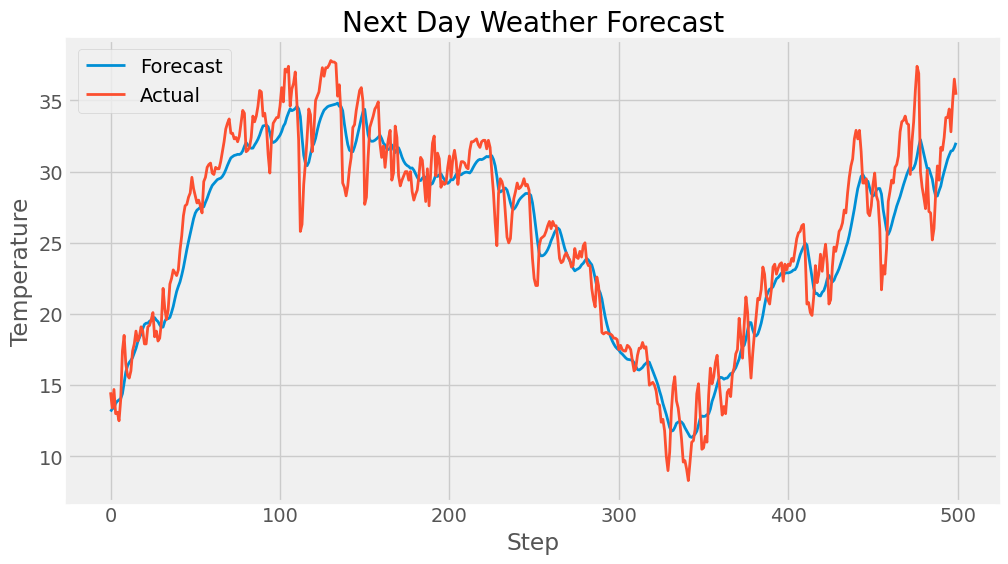

In [44]:
plt.figure(figsize=(12,6))
plt.style.use("fivethirtyeight")
plt.title("Next Day Weather Forecast")
plt.xlabel("Step")
plt.ylabel("Temperature")
plt.plot(pred,lw=2)
plt.plot(scaler.inverse_transform(y_train),lw=2)
plt.legend(["Forecast","Actual"])


### Plotting prediction and y_test values

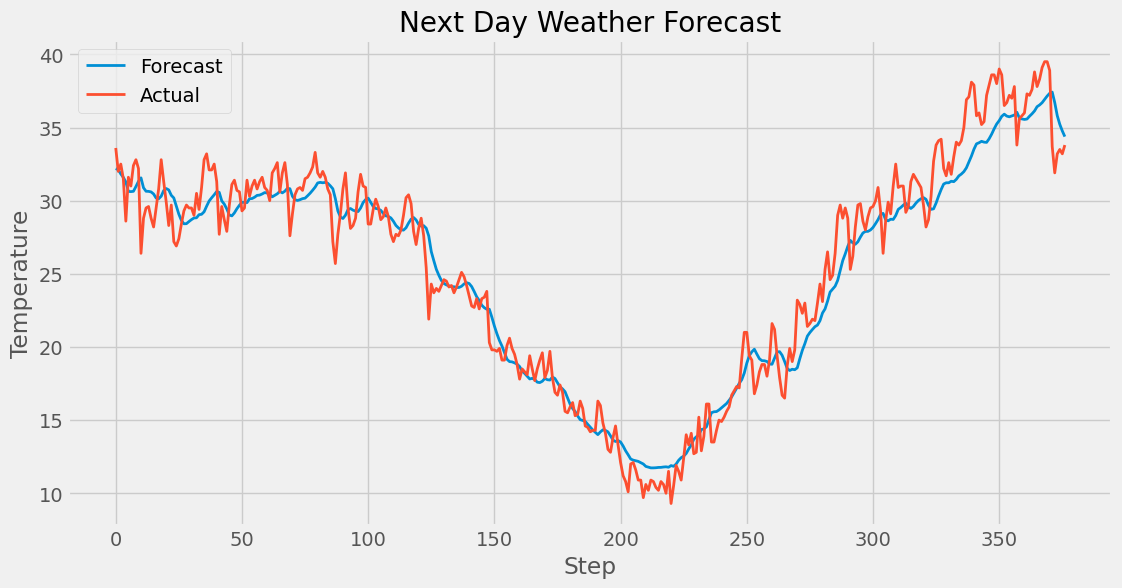

In [45]:
plt.figure(figsize=(12,6))
plt.style.use("fivethirtyeight")
plt.title("Next Day Weather Forecast")
plt.xlabel("Step")
plt.ylabel("Temperature")
plt.plot(predictions,lw=2)
plt.plot(scaler.inverse_transform(y_test),lw=2)
plt.legend(["Forecast","Actual"])


In [46]:
X0.shape

(877, 30)

In [47]:
X.shape

(877, 30, 1)

In [48]:
metrics=pd.read_csv("logs.csv")

In [49]:
metrics.head()

,epoch,loss,mae,val_loss,val_mae
0,0,0.131391,0.293959,0.021965,0.122407
1,1,0.020429,0.112992,0.023205,0.130877
2,2,0.015349,0.100040,0.009434,0.079124
3,3,0.014700,0.098784,0.011281,0.088114
4,4,0.012596,0.089835,0.011265,0.088904


#### Visualising Metics

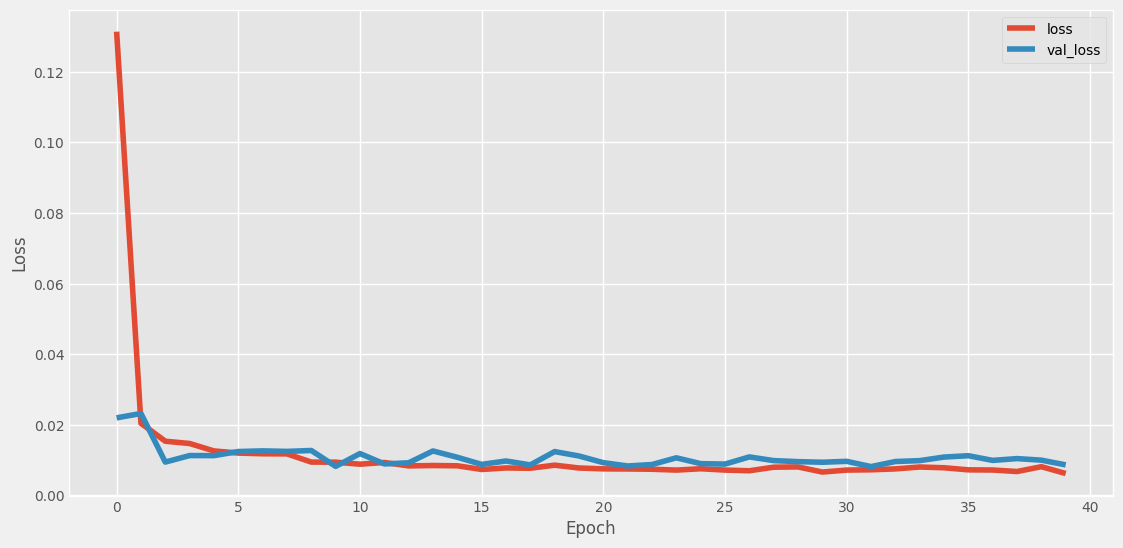

In [50]:
plt.figure(figsize=(12,6))
plt.style.use("ggplot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(metrics["loss"],label="loss")
plt.plot(metrics["val_loss"],label="val_loss")
plt.legend(loc="best")


#### Saving the model and transformation file

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 400,133 (1.53 MB)

 Trainable params: 133,377 (521.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 266,756 (1.02 MB)

In [52]:
model.save("LSTM model.keras")

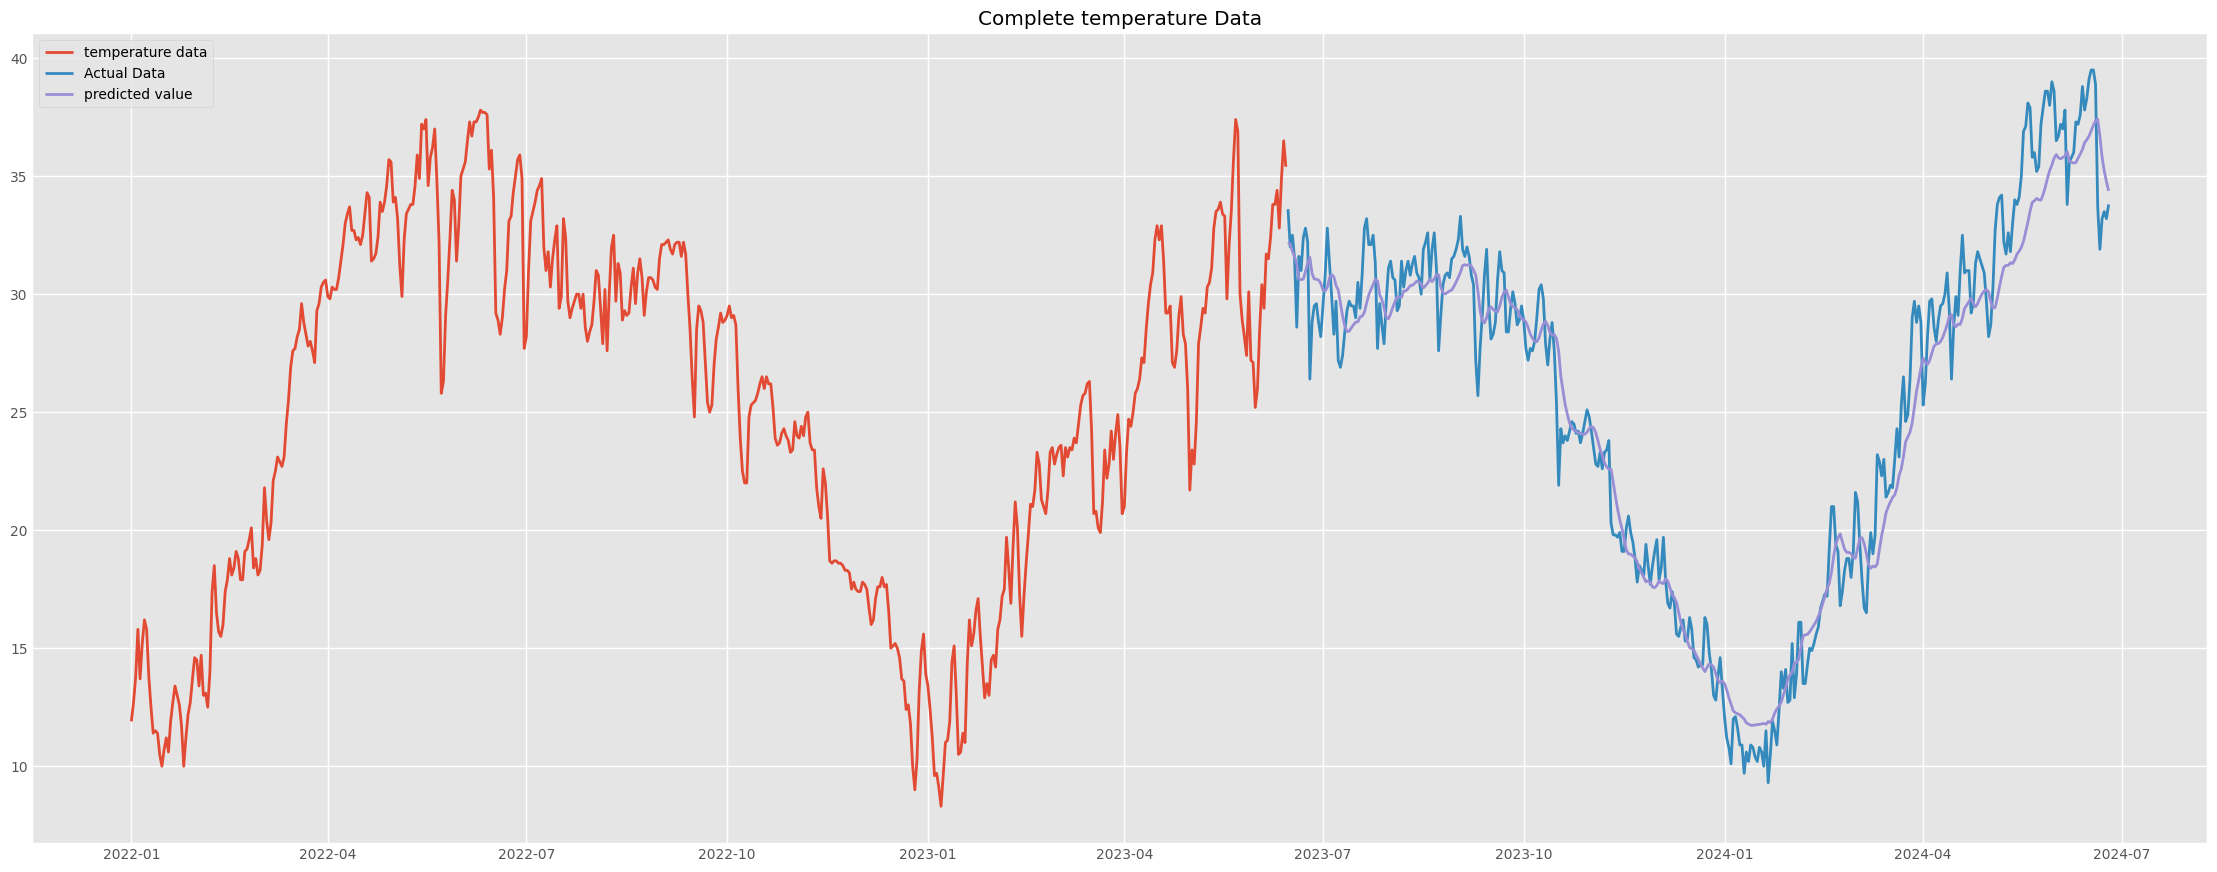

In [53]:
y_test_inv=scaler.inverse_transform(y_test)
inv_y_train=scaler.inverse_transform(y_train)
inv_X10=scaler.inverse_transform(X10)
plotting_data=pd.DataFrame({
    "y_test values":y_test_inv.reshape(-1),
    "y_test_pred":predictions.reshape(-1)
},
    index=df_datetime.index[500 + 30:]
)
plotting_data

whole_df=pd.concat([df_datetime["temp"][:530],plotting_data],axis=0)
whole_df.head().fillna(0)

plt.figure(figsize=(25,10))
plt.title("Complete temperature Data")
plt.plot(whole_df,lw=2)
# plt.plot(inv_y_train,lw=2)
# plt.plot(df_datetime["temp"],lw=2)
# plt.plot(scaler.inverse_transform(y)[:50],lw=2)
# plt.plot(pd.DataFrame(inv_predictions),lw=2)
plt.legend(["temperature data","Actual Data","predicted value"],loc="best")

plt.show()

In [54]:
plotting_data

,y_test values,y_test_pred
date,,
2023-06-15,33.6,32.192944
2023-06-16,32.0,32.115940
2023-06-17,32.5,31.823389
2023-06-18,31.5,31.590172
2023-06-19,28.6,31.277767
...,...,...
2024-06-21,31.9,36.701477
2024-06-22,33.2,35.807152
2024-06-23,33.5,35.218346
